In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import copy

In [48]:
# Example vehicle data
data = {
"vehicle_serial_no": [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
" mileage ": [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000,75000, 280000],
"fuel_efficiency": [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
"maintenance_cost": [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
"vehicle_type": ["SUV", "Sedan", "Truck", "Hatchback", "Sedan&", "Truck&", "SUV", "Truck","Hatchback&", "SUV"]
}
# Create a DataFrame
df = pd.DataFrame(data)
numerical_cols = df.drop(columns=["vehicle_type"]).columns
# df = pd.get_dummies(df,columns=["vehicle_type"],drop_first=True)
df = df[numerical_cols]
df2 = copy.deepcopy(df)
display(df)

,vehicle_serial_no,mileage,fuel_efficiency,maintenance_cost
0,5,150000,15,5000
1,3,120000,18,4000
2,8,250000,10,7000
3,2,80000,22,2000
4,4,100000,20,3000
5,7,220000,12,6500
6,6,180000,16,5500
7,10,300000,8,8000
8,1,75000,24,1500
9,9,280000,9,7500


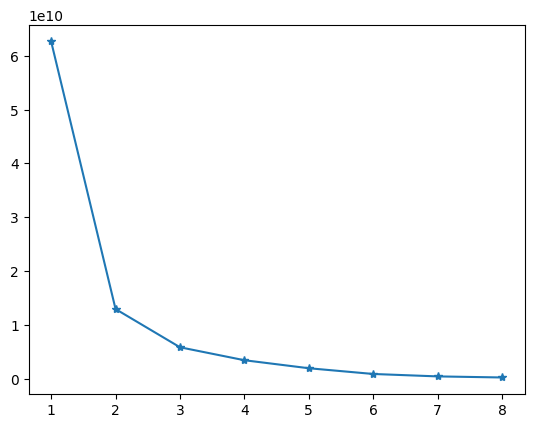

In [49]:
inertias = []
for i in range(1,9):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(df)
    inertias.append(km.inertia_)

plt.Figure(figsize=(8,6))
plt.plot(range(1,9),inertias,marker="*")
plt.show()

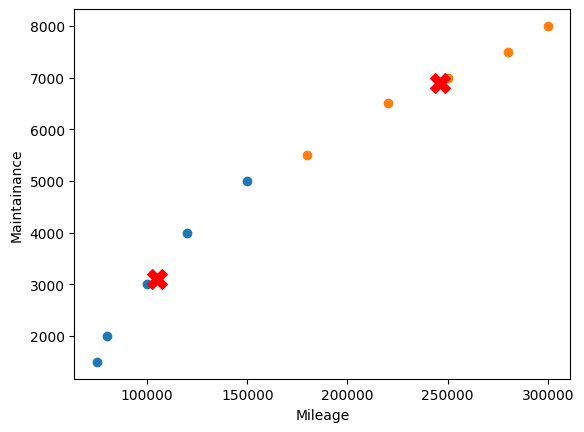

In [50]:
km = KMeans(n_clusters=2,init="k-means++",random_state=42)
km.fit(df)
df["Clusters"] =km.predict(df)

for i in range(2):
    cluster_points = df[df["Clusters"] == i]
    plt.scatter(
        cluster_points.iloc[:,1], cluster_points.iloc[:,3],label=f"Cluster: {i}"
    )

plt.scatter(
    km.cluster_centers_[:,1], km.cluster_centers_[:,3],s=200,c="red",marker="X",label="Centroids"
)
plt.xlabel("Mileage")
plt.ylabel("Maintainance")
plt.show()

,vehicle_serial_no,mileage,fuel_efficiency,maintenance_cost,Clusters
0,5,150000,15,5000,0
1,3,120000,18,4000,0
2,8,250000,10,7000,1
3,2,80000,22,2000,0
4,4,100000,20,3000,0
5,7,220000,12,6500,1
6,6,180000,16,5500,1
7,10,300000,8,8000,1
8,1,75000,24,1500,0
9,9,280000,9,7500,1


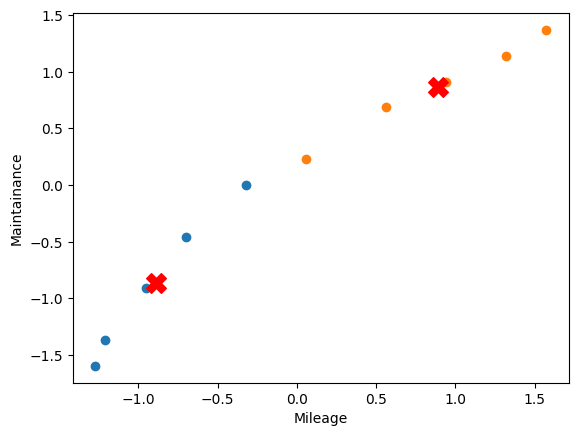

In [51]:
km = KMeans(n_clusters=2,init="k-means++",random_state=42)
ss = StandardScaler()
df_scaled= ss.fit_transform(df2)
km.fit(df_scaled)
pred= km.predict(df_scaled)
df_scaled = pd.DataFrame(df_scaled,columns=numerical_cols)
df_scaled["Clusters"] = pred
display(df)
for i in range(2):
    cluster_points = df_scaled[df_scaled["Clusters"] == i]
    plt.scatter(
        cluster_points.iloc[:,1], cluster_points.iloc[:,3],label=f"Cluster: {i}"
    )

plt.scatter(
    km.cluster_centers_[:,1], km.cluster_centers_[:,3],s=200,c="red",marker="X",label="Centroids"
)
plt.xlabel("Mileage")
plt.ylabel("Maintainance")
plt.show()

In [52]:
df1 = pd.read_csv("student_data.csv")
display(df1.head())
selected_features = ["GPA","study_hours","attendance_rate"]

df1_selected = df1[selected_features]
display(df1_selected.head())

df1_scaled = ss.fit_transform(df1_selected)
# display(df1_scaled)

,student_id,GPA,study_hours,attendance_rate
0,S001,3.25,4.8,78.6
1,S002,2.93,7.7,80.6
2,S003,3.32,8.0,85.8
3,S004,3.76,6.6,85.5
4,S005,2.88,8.5,61.2


,GPA,study_hours,attendance_rate
0,3.25,4.8,78.6
1,2.93,7.7,80.6
2,3.32,8.0,85.8
3,3.76,6.6,85.5
4,2.88,8.5,61.2


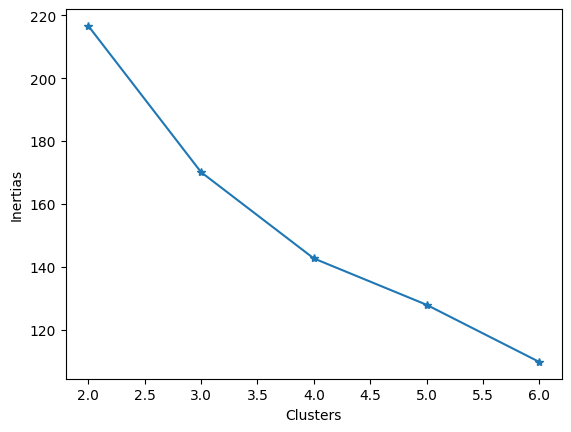

In [53]:
ine =[]
for i in range(2,7):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(df1_scaled)
    ine.append(km.inertia_)

plt.Figure(figsize=(8,6))
plt.plot(range(2,7),ine,marker="*")
plt.xlabel("Clusters")
plt.ylabel("Inertias")
plt.show()

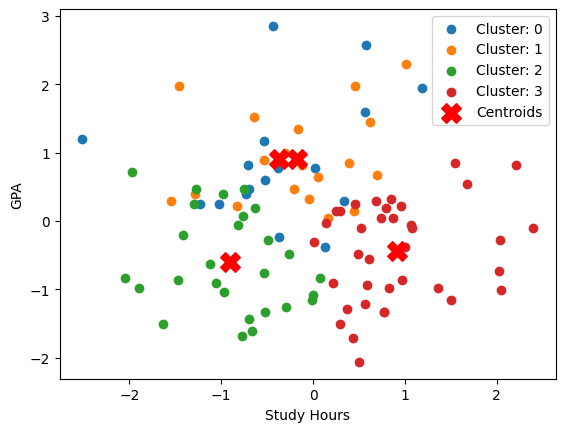

In [55]:
df1_scaled = pd.DataFrame(df1_scaled,columns=selected_features)
# display(df1_scaled)
km = KMeans(n_clusters=4,init="k-means++",random_state=42)
km.fit(df1_scaled)
df1["Clusters"] = km.predict(df1_scaled)
df1_scaled["Clusters"] = km.predict(df1_scaled)
for i in range(4):
    cluster_points = df1_scaled[df1_scaled["Clusters"] == i]
    plt.scatter(cluster_points.iloc[:,2],cluster_points.iloc[:,1],label= f"Cluster: {i}")

plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,1],s=200,c="red",marker="X",label="Centroids")
plt.legend()
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()